## Scale test using circles

Can model detect circles at different scales?



Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


Cellpose version: 4.0.1 (major number: 4)


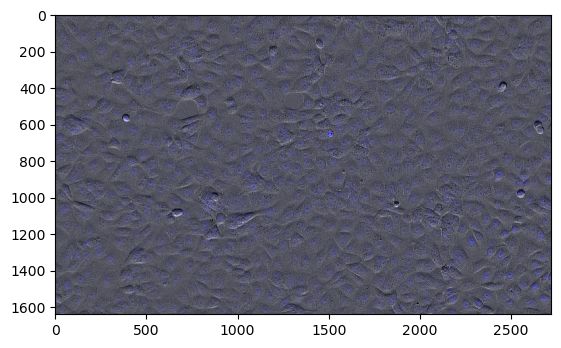

In [1]:
import random
from skimage.io import imread
import matplotlib.pyplot as plt
import cellpose
from cellpose import models, io
try:
    from tnia.plotting.plt_helper import random_label_cmap
    cmap = random_label_cmap()
except ImportError:
    cmap = None

name = 'CD7_CALU3_Hoechst.tiff'
name_without_extension = name.split('.')[0]
image = imread(name)

plt.imshow(image, cmap='gray')

major_number = cellpose.version.split('.')[0]
print(f"Cellpose version: {cellpose.version} (major number: {major_number})")

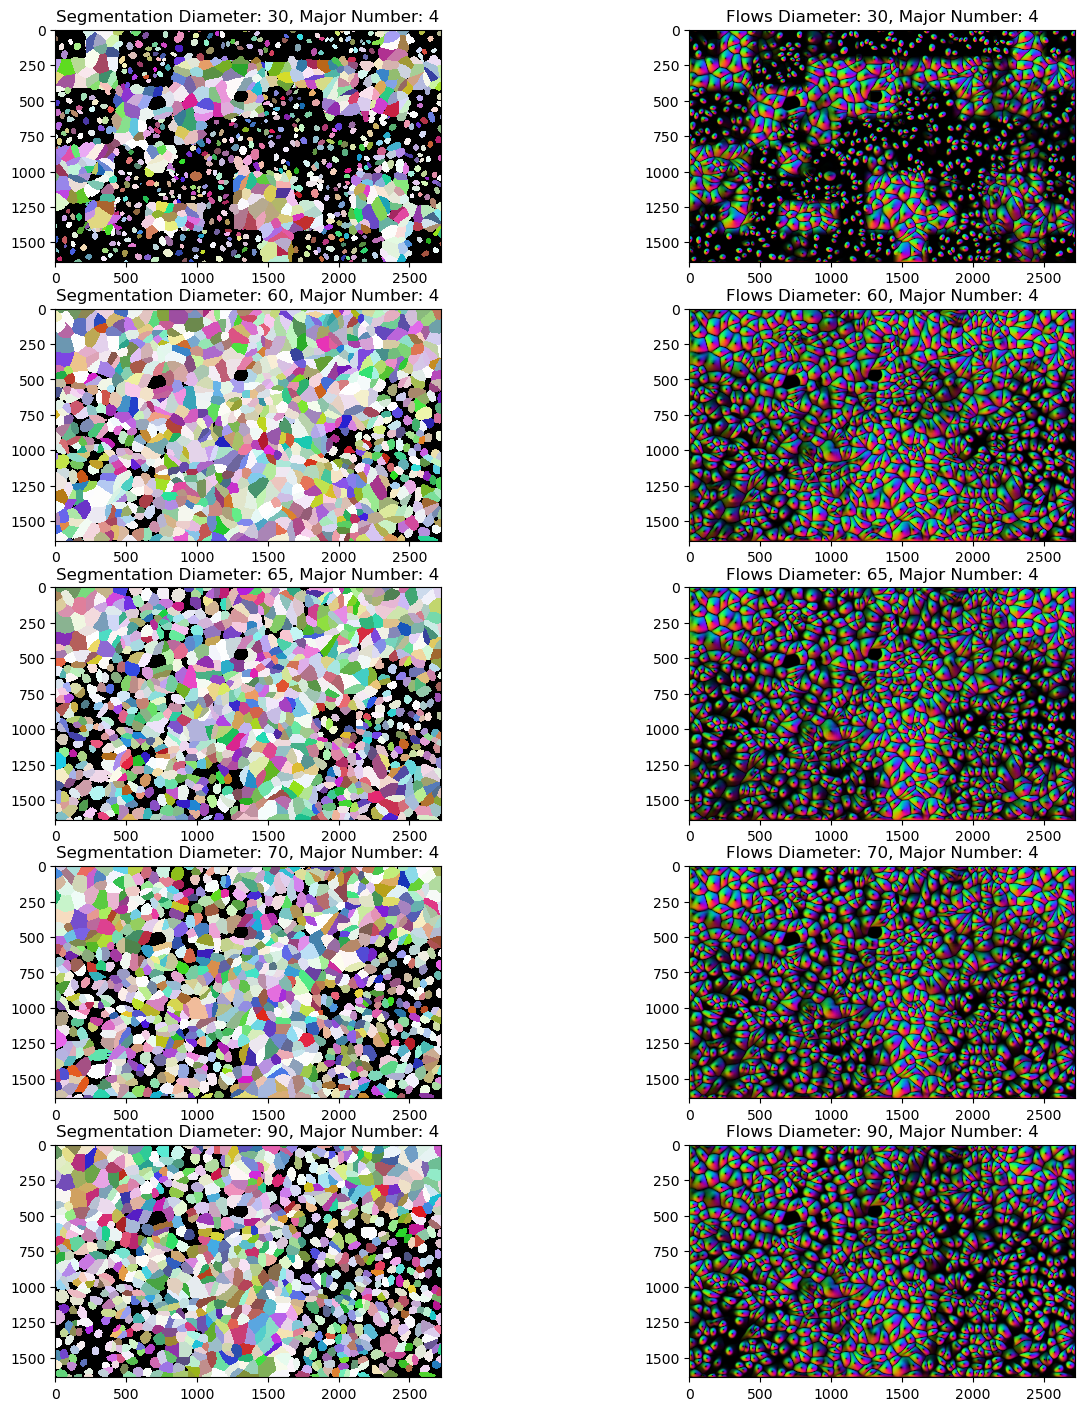

In [4]:
if major_number == '3':
    model = models.Cellpose(gpu=True, model_type='cyto3')
elif major_number == '4':
    model = models.CellposeModel(gpu=True)

diameters = [30, 60, 65, 70, 90]
#diameters = [240, 300, 360, 420, 480]
#diameters = [280, 290, 300, 310, 320, 330, 340, 350]

fig, axes = plt.subplots(len(diameters), 2, figsize=(15, len(diameters) * 3.5))

for row, d in enumerate(diameters):
    result = model.eval(image, cellprob_threshold=-1, flow_threshold=0, diameter=d)


    axes[row,0].imshow(result[0], cmap=cmap)
    axes[row,0].set_title(f"Segmentation Diameter: {d}, Major Number: {major_number}")
    axes[row,1].imshow(result[1][0])
    axes[row,1].set_title(f"Flows Diameter: {d}, Major Number: {major_number}")

fig.savefig(f'cellpose_diameter_{name_without_extension}_{cellpose.version}.png', dpi=300, bbox_inches='tight')

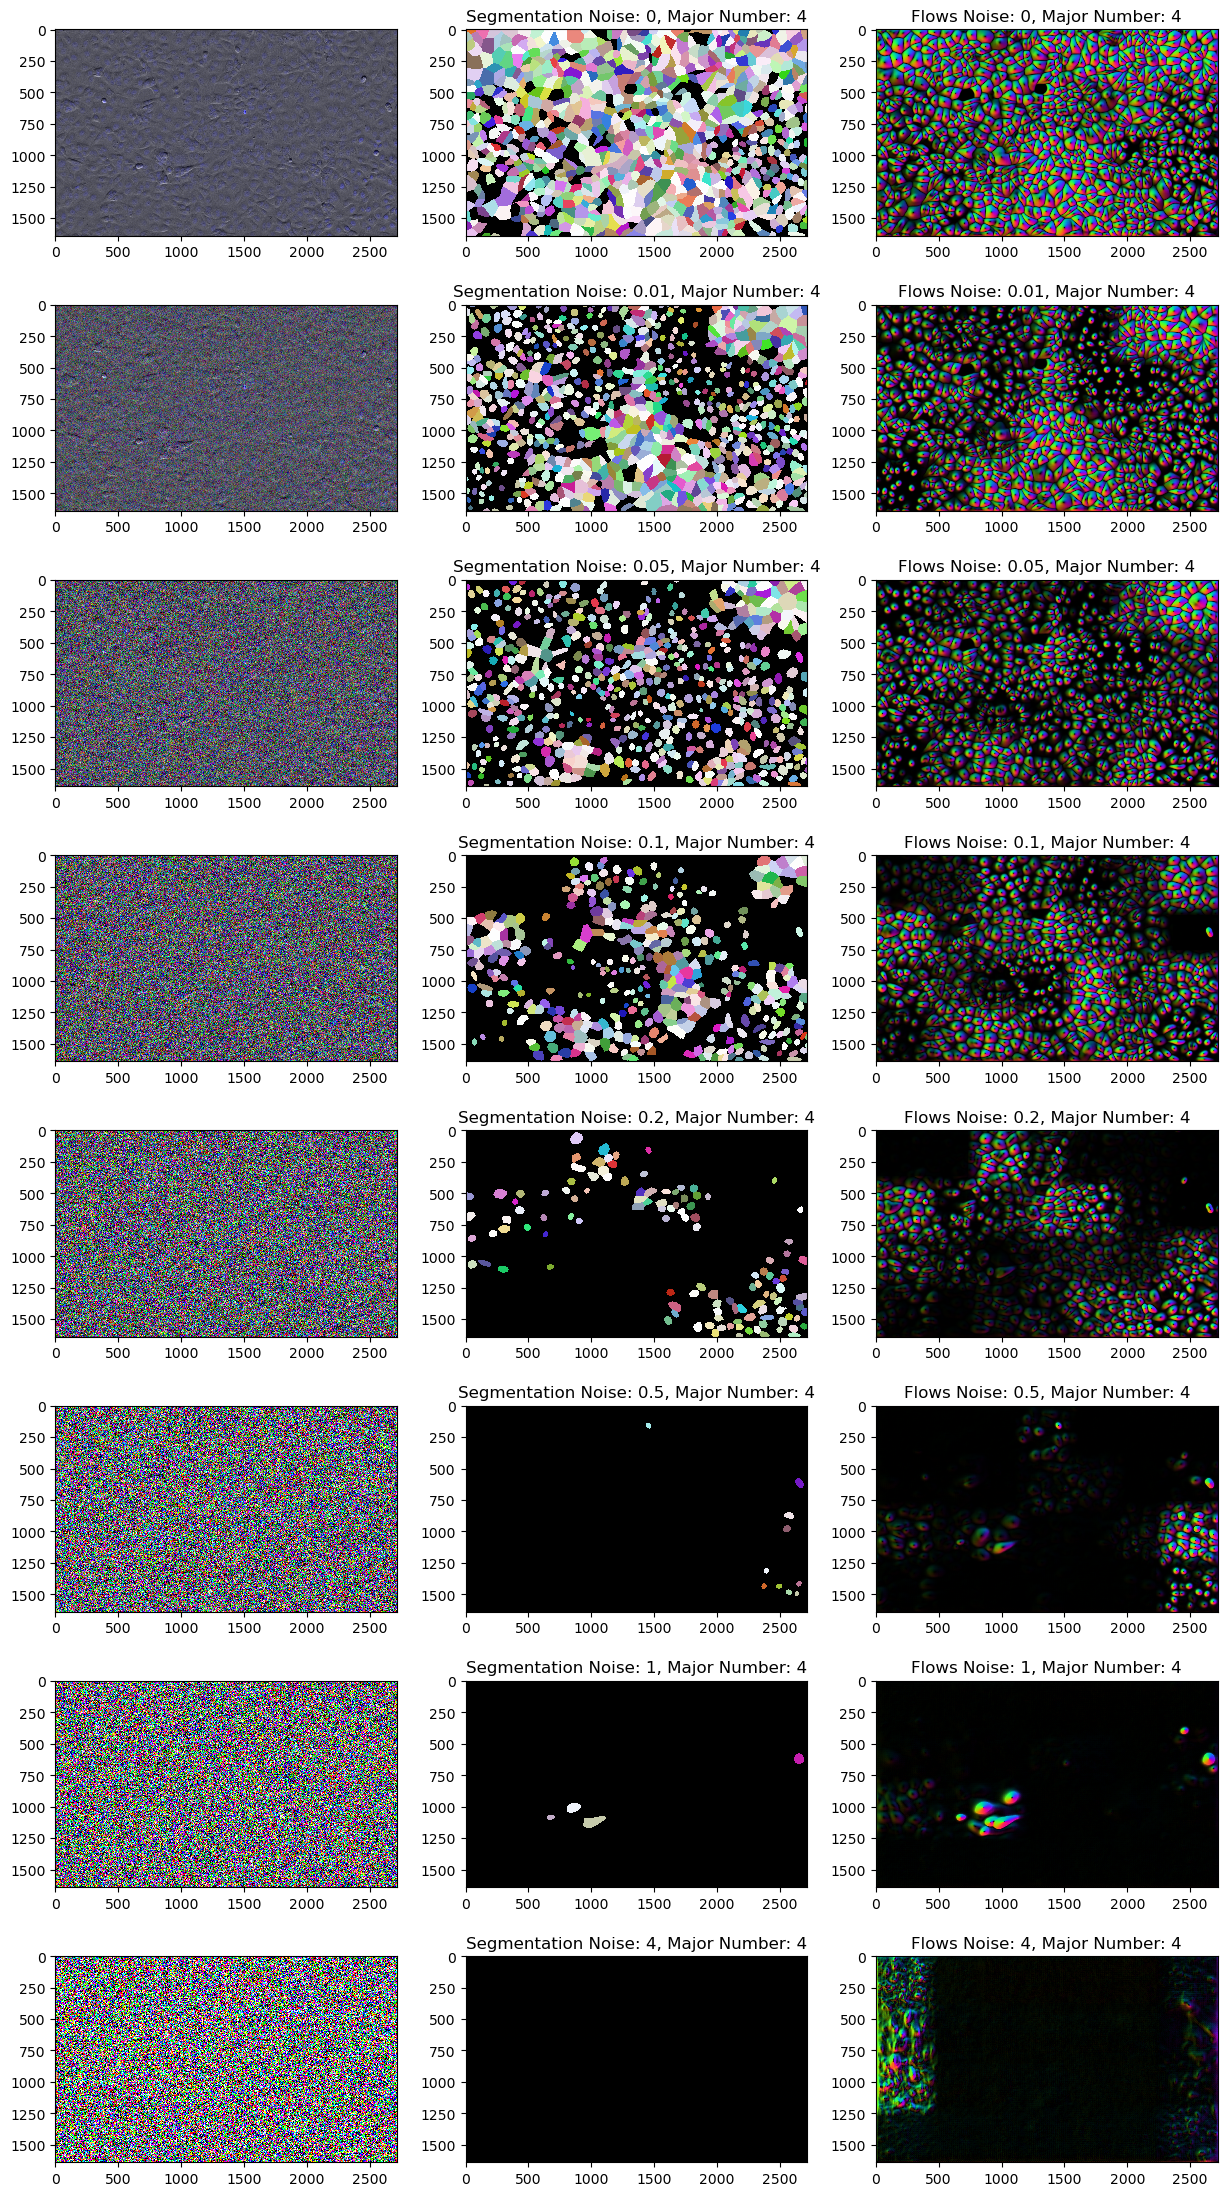

In [3]:
from skimage import util
# different noise levels
noise_levels = [0, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 4]
fig, axes = plt.subplots(len(noise_levels), 3, figsize=(15, len(noise_levels) * 3.5))

row = 0
for row, noise in enumerate(noise_levels):
    # Add noise to the image
    noisy_image = image + noise * random.random() * image.std()
    noisy_image = util.random_noise(image, mode='gaussian', var=noise)
    
    result = model.eval(noisy_image, cellprob_threshold=-0.8, niter=2000, diameter=60)

    axes[row,0].imshow(noisy_image/noisy_image.max(), cmap='gray')
    axes[row,1].imshow(result[0], cmap=cmap)
    axes[row,1].set_title(f"Segmentation Noise: {noise}, Major Number: {major_number}")
    axes[row,2].imshow(result[1][0])
    axes[row,2].set_title(f"Flows Noise: {noise}, Major Number: {major_number}")

fig.savefig(f'cellpose_noise_{name_without_extension}_{cellpose.version}.png', dpi=300, bbox_inches='tight')

In [26]:
result_6 = model.eval(image, cellprob_threshold=-0.8, niter=2000, diameter=6)
result_15 = model.eval(image, cellprob_threshold=-0.8, niter=2000, diameter=15)
result_30 = model.eval(image, cellprob_threshold=-0.8, niter=2000, diameter=30)
result_60 = model.eval(image, cellprob_threshold=-0.8, niter=2000, diameter=60)

In [9]:
import napari

viewer = napari.Viewer()

viewer.add_image(image, name='Image')
viewer.add_labels(result_6[0], name='Segmentation diameter 6')
viewer.add_labels(result_15[0], name='Segmentation diameter 15')
viewer.add_labels(result_30[0], name='Segmentation diameter 30')
viewer.add_labels(result_60[0], name='Segmentation diameter 60')


<Labels layer 'Segmentation diameter 60' at 0x1a2acd55510>

In [10]:
result_3 = model.eval(image, cellprob_threshold=-4, flow_threshold = 1, niter=2000, diameter=3)

viewer.add_labels(result_3[0], name='Segmentation diameter 3')

<Labels layer 'Segmentation diameter 3' at 0x1a2b4b58850>

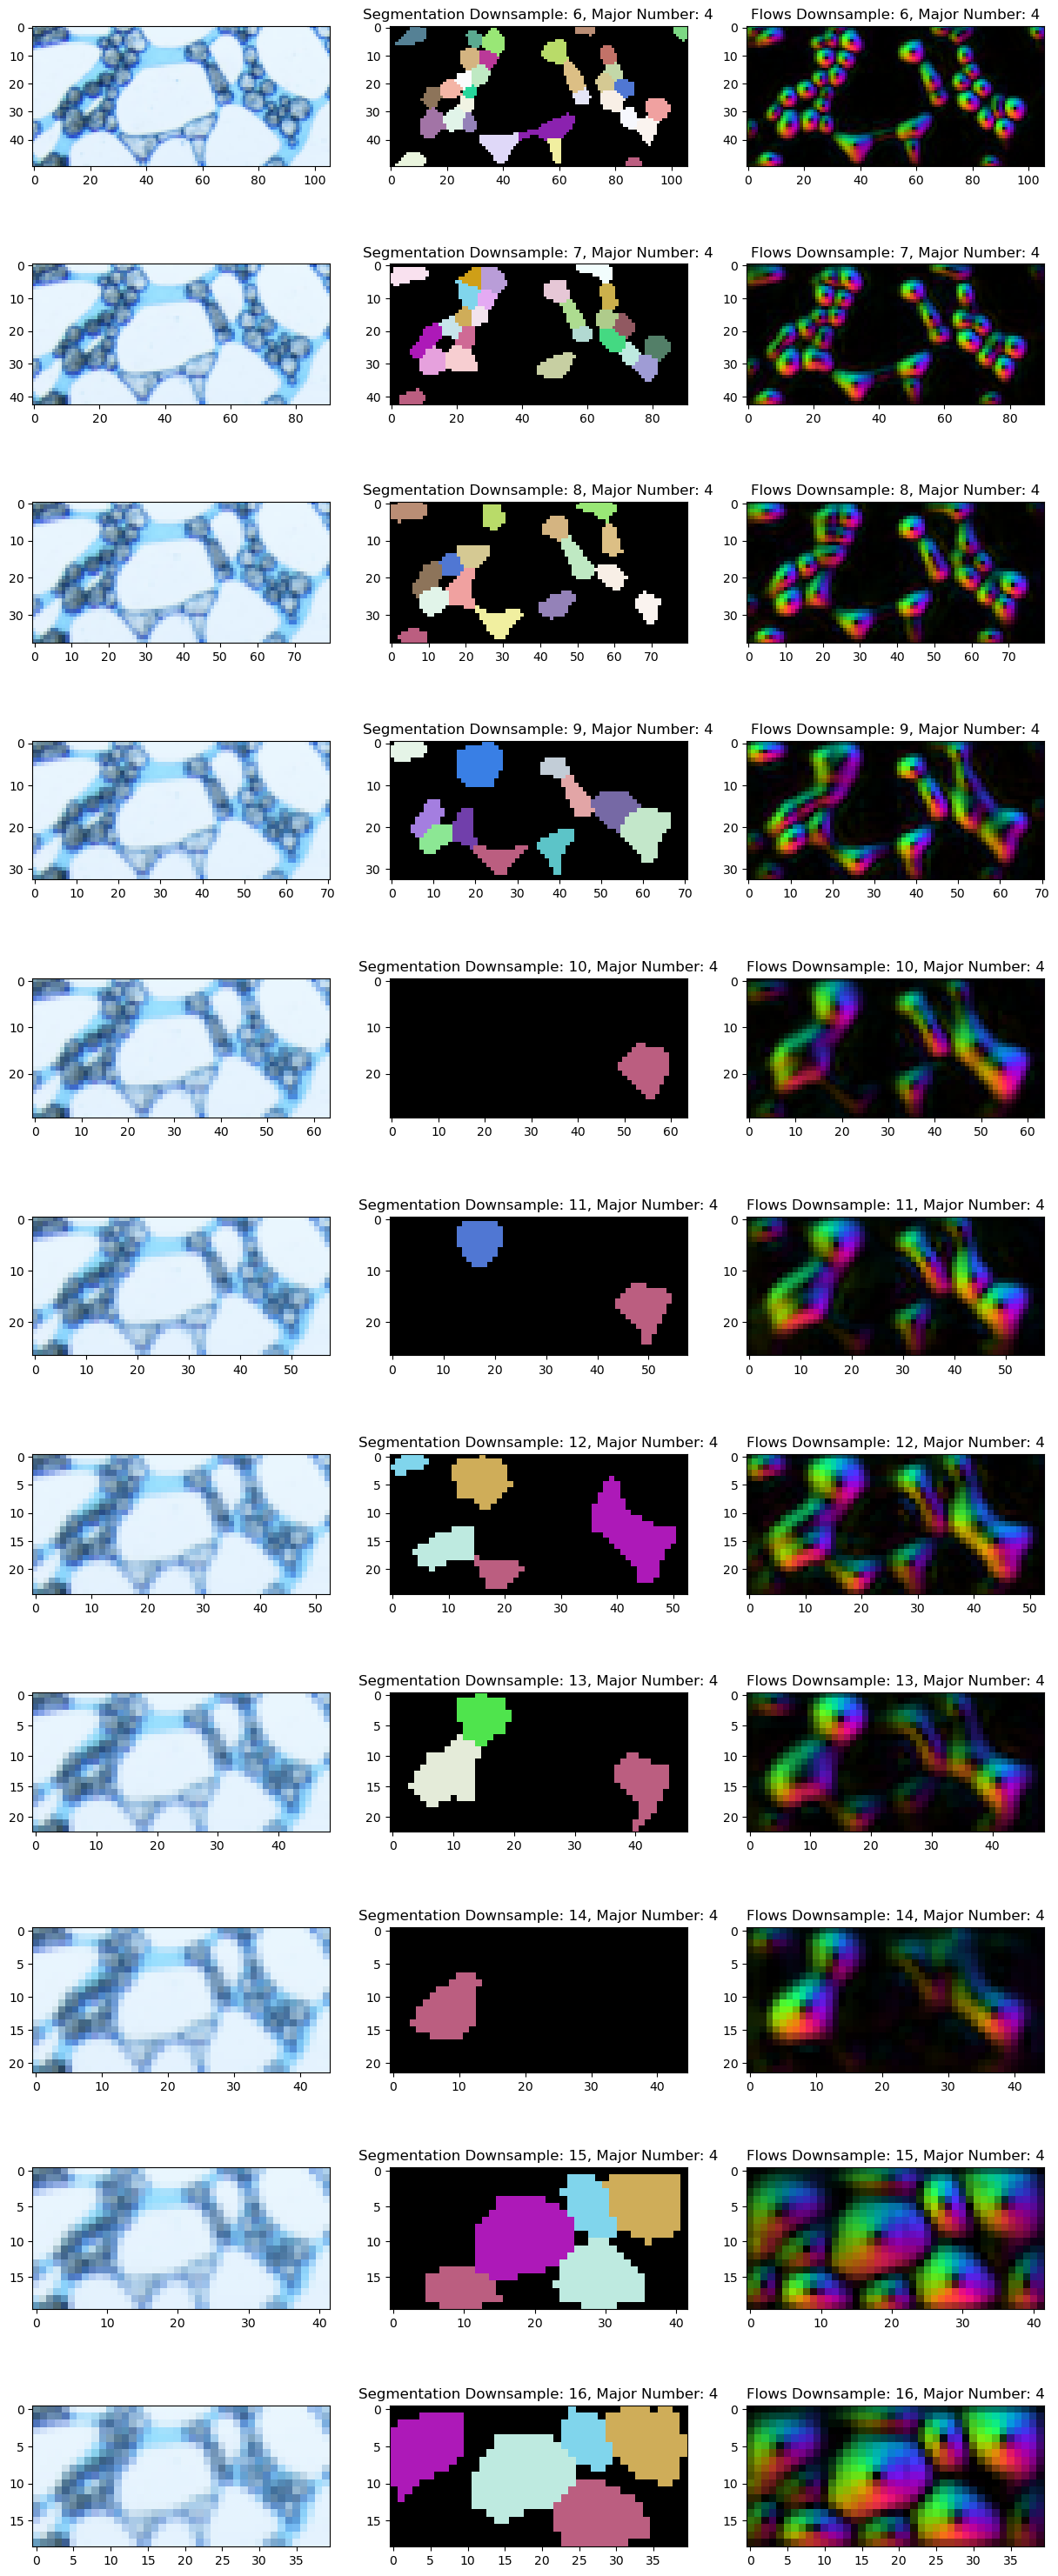

In [72]:
from skimage import util
from skimage.transform import rescale

# different noise levels
downsamples = [1, 2, 4, 8, 16]
downsamples = [14, 14.2, 14.4, 14.6, 14.8, 15, 15.2, 15.4, 15.6, 15.8, 16]
downsamples = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
fig, axes = plt.subplots(len(downsamples), 3, figsize=(15, len(downsamples) * 3.5))

row = 0
for row, ds in enumerate(downsamples):
    # Downsample the image
    downsampled_image = rescale(image, 1/ds, anti_aliasing=True, channel_axis=-1) 
    result = model.eval(downsampled_image, cellprob_threshold=-0.8, niter=2000)

    axes[row,0].imshow(downsampled_image, cmap='gray')
    axes[row,1].imshow(result[0], cmap=cmap)
    axes[row,1].set_title(f"Segmentation Downsample: {ds}, Major Number: {major_number}")
    axes[row,2].imshow(result[1][0])
    axes[row,2].set_title(f"Flows Downsample: {ds}, Major Number: {major_number}")

fig.savefig(f'cellpose_downsample_{name_without_extension}_{cellpose.version}.png', dpi=300, bbox_inches='tight')